In [ ]:
data_path = '/home/naji/Desktop/github-repos/machine-learning/nbs/0-datasets/data/'

# Scale Numerical Data

**Numerical Data Scaling Methods**

In [ ]:
from pandas import read_csv, DataFrame
from numpy import asarray, mean, std
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

**Data Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = asarray([[100, 0.001],
                [8, 0.05],
                [50, 0.005],
                [88, 0.07],
                [4, 0.1]])

In [ ]:
print(data)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]


In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled = scaler.fit_transform(data)

In [ ]:
print(scaled)

[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


**Data Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data = asarray([[100, 0.001],
                [8, 0.05],
                [50, 0.005],
                [88, 0.07],
                [4, 0.1]])

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled = scaler.fit_transform(data)

In [ ]:
print(scaled)

[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


**Diabetes Dataset**

In [ ]:
df = read_csv(data_path + 'pima-indians-diabetes.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
print(df.describe())

                0           1           2  ...           6           7           8
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


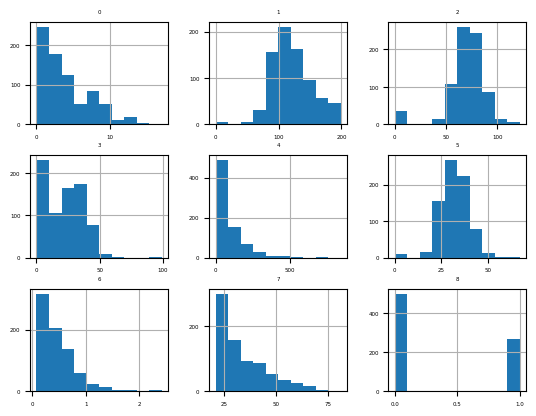

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')

In [ ]:
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
model = KNeighborsClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(scores):0.3f}  {std(scores):0.3f}')

Accuracy: 0.717  0.040


MinMaxScaler Transform

In [ ]:
df = read_csv(data_path + 'pima-indians-diabetes.csv', header=None)

In [ ]:
data = df.values

In [ ]:
trans = MinMaxScaler()

In [ ]:
data = trans.fit_transform(data)

In [ ]:
df = DataFrame(data)

In [ ]:
print(df.describe())

                0           1           2  ...           6           7           8
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     0.226180    0.607510    0.566438  ...    0.168179    0.204015    0.348958
std      0.198210    0.160666    0.158654  ...    0.141473    0.196004    0.476951
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.058824    0.497487    0.508197  ...    0.070773    0.050000    0.000000
50%      0.176471    0.587940    0.590164  ...    0.125747    0.133333    0.000000
75%      0.352941    0.704774    0.655738  ...    0.234095    0.333333    1.000000
max      1.000000    1.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 9 columns]


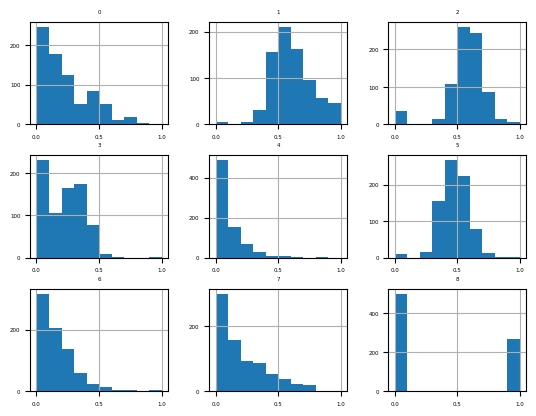

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

**Train the model**

In [ ]:
df = read_csv(data_path + 'pima-indians-diabetes.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
trans = MinMaxScaler()

In [ ]:
model = KNeighborsClassifier()

In [ ]:
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(scores):0.3f}, {std(scores):.3f}')

Accuracy: 0.739, 0.053


StandardScaler Transform

In [ ]:
df = read_csv(data_path + 'pima-indians-diabetes.csv', header=None)

In [ ]:
data = df.values[:, :-1]

In [ ]:
trans = StandardScaler()

In [ ]:
data = trans.fit_transform(data)

In [ ]:
df = DataFrame(data)

In [ ]:
print(df.describe())

                  0             1  ...             6             7
count  7.680000e+02  7.680000e+02  ...  7.680000e+02  7.680000e+02
mean  -6.476301e-17 -9.251859e-18  ...  2.451743e-16  1.931325e-16
std    1.000652e+00  1.000652e+00  ...  1.000652e+00  1.000652e+00
min   -1.141852e+00 -3.783654e+00  ... -1.189553e+00 -1.041549e+00
25%   -8.448851e-01 -6.852363e-01  ... -6.889685e-01 -7.862862e-01
50%   -2.509521e-01 -1.218877e-01  ... -3.001282e-01 -3.608474e-01
75%    6.399473e-01  6.057709e-01  ...  4.662269e-01  6.602056e-01
max    3.906578e+00  2.444478e+00  ...  5.883565e+00  4.063716e+00

[8 rows x 8 columns]


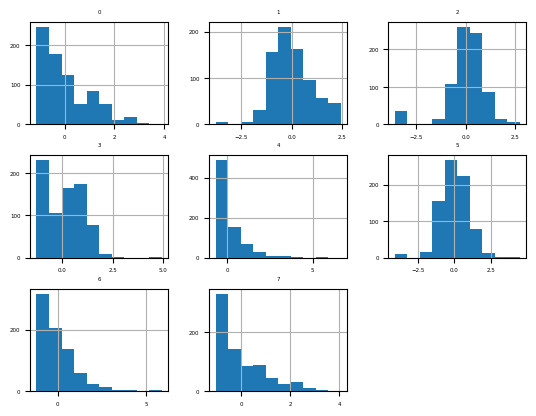

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

Train the model

In [ ]:
df = read_csv(data_path + 'pima-indians-diabetes.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')

In [ ]:
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
trans = StandardScaler()

In [ ]:
model = KNeighborsClassifier()

In [ ]:
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(scores):.3f}  {std(scores):.3f}')

Accuracy: 0.741  0.050


# Scale Data With Outliers

**IQR Robust Scaler Transform**

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
df = read_csv(data_path + 'pima-indians-diabetes.csv', header=None)

In [ ]:
data = df.values[:, :-1]

In [ ]:
trans = RobustScaler()

In [ ]:
data = trans.fit_transform(data)

In [ ]:
df = DataFrame(data)

In [ ]:
print(df.describe())

                0           1           2  ...           5           6           7
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     0.169010    0.094413   -0.160807  ...   -0.000798    0.259807    0.249464
std      0.673916    0.775094    1.075323  ...    0.847759    0.866219    0.691778
min     -0.600000   -2.836364   -4.000000  ...   -3.440860   -0.769935   -0.470588
25%     -0.400000   -0.436364   -0.555556  ...   -0.505376   -0.336601   -0.294118
50%      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
75%      0.600000    0.563636    0.444444  ...    0.494624    0.663399    0.705882
max      2.800000    1.987879    2.777778  ...    3.774194    5.352941    3.058824

[8 rows x 8 columns]


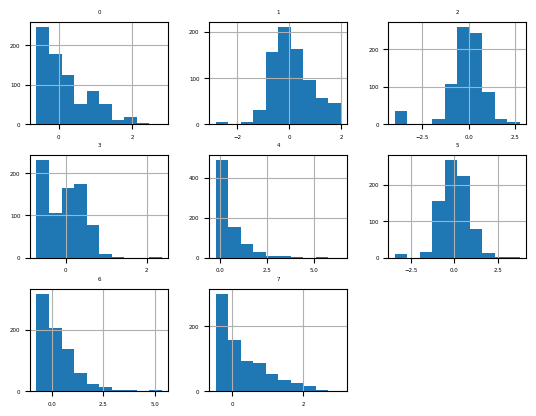

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

Train the model

In [ ]:
df = read_csv(data_path + 'pima-indians-diabetes.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')

In [ ]:
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
trans = RobustScaler()

In [ ]:
model = KNeighborsClassifier()

In [ ]:
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(scores):.3f}  {std(scores):.3f}')

Accuracy: 0.734  0.044


Explore Robust Scaler Range

In [ ]:
def get_dataset():
    df = read_csv(data_path + 'pima-indians-diabetes.csv', header=None)
    data = df.values
    X, y = data[:, :-1], data[:, -1]
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

In [ ]:
def get_models():
    models = dict()
    for value in [1, 5, 10, 20, 25, 30]:
        trans = RobustScaler(quantile_range=(value, 100-value))
        model = KNeighborsClassifier()
        models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    return scores

In [ ]:
x, y = get_dataset()

In [ ]:
models = get_models()

In [ ]:
results, names = list(), list()

In [ ]:
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f'{name:} {mean(scores):.3f} {std(scores):.3f}')

1 0.734 0.054
5 0.736 0.051
10 0.739 0.047
20 0.734 0.050
25 0.734 0.044
30 0.735 0.042


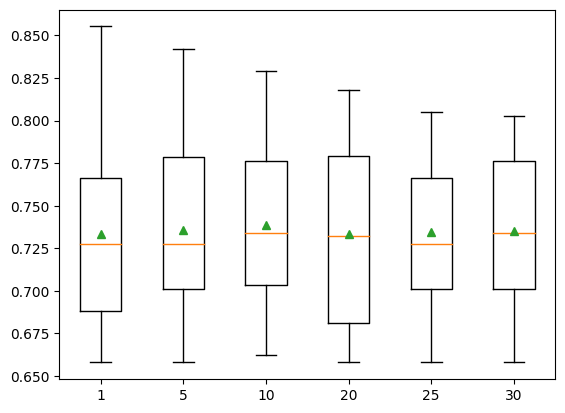

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Encode Categorical Data

**Encoding Categorical Data**

**Ordinal Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data = asarray([['red'], ['green'], ['blue']])

In [ ]:
print(data)

[['red']
 ['green']
 ['blue']]


In [ ]:
encoder = OrdinalEncoder()

In [ ]:
result = encoder.fit_transform(data)

In [ ]:
print(result)

[[2.]
 [1.]
 [0.]]


**One Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = asarray([['red'], ['green'], ['blue']])

In [ ]:
print(data)

[['red']
 ['green']
 ['blue']]


In [ ]:
encoder = OneHotEncoder(sparse=False)

In [ ]:
onehot = encoder.fit_transform(data)

In [ ]:
print(onehot)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


**Dummy Variable Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = asarray([['red'],['green'],['blue']])
print(data)

[['red']
 ['green']
 ['blue']]


In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)

In [ ]:
onehot = encoder.fit_transform(data)
print(onehot)

[[0. 1.]
 [1. 0.]
 [0. 0.]]


**Breast Cancer Dataset**

In [ ]:
df = read_csv(data_path + 'breast-cancer.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [ ]:
data = df.values

In [ ]:
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

In [ ]:
print('Input', X.shape)

Input (286, 9)


In [ ]:
print('Output', y.shape)

Output (286,)


**OrdinalEncoder Transform**

In [ ]:
ordinal_encoder = OrdinalEncoder()

In [ ]:
X = ordinal_encoder.fit_transform(X)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
print('Input', X.shape)

Input (286, 9)


In [ ]:
X[:10, :]

array([[2., 2., 2., 0., 1., 2., 1., 2., 0.],
       [3., 0., 2., 0., 0., 0., 1., 0., 0.],
       [3., 0., 6., 0., 0., 1., 0., 1., 0.],
       [2., 2., 6., 0., 1., 2., 1., 1., 1.],
       [2., 2., 5., 4., 1., 1., 0., 4., 0.],
       [3., 2., 4., 4., 0., 1., 1., 2., 1.],
       [3., 0., 7., 0., 0., 2., 0., 2., 0.],
       [2., 2., 1., 0., 0., 1., 0., 2., 0.],
       [2., 2., 0., 0., 0., 1., 1., 3., 0.],
       [2., 0., 7., 2., 1., 1., 1., 2., 1.]])

In [ ]:
print('Output', y.shape)

Output (286,)


In [ ]:
y[:10]

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

**Training a model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = read_csv(data_path + 'breast-cancer.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1)

In [ ]:
ordinal_encoder = OrdinalEncoder()

In [ ]:
ordinal_encoder.fit(X_train)

OrdinalEncoder()

In [ ]:
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
label_encoder.fit(y_train)

LabelEncoder()

In [ ]:
y_train = label_encoder.transform(y_train)

In [ ]:
y_test = label_encoder.transform(y_test)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
yhat = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, yhat)

In [ ]:
print(f'Accuracy: {accuracy*100: .3f}')

Accuracy:  75.789


**OneHotEncoder Transform**

In [ ]:
df = read_csv(data_path + 'breast-cancer.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

In [ ]:
X = onehot_encoder.fit_transform(X)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
print('Input', X.shape)

Input (286, 43)


In [ ]:
print(X[:5, :])

[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]]


**Train the model**

In [ ]:
df = read_csv(data_path + 'breast-cancer.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
onehot_encoder = OneHotEncoder()

In [ ]:
onehot_encoder.fit(X_train)

OneHotEncoder()

In [ ]:
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
label_encoder.fit(y_train)

LabelEncoder()

In [ ]:
y_train = label_encoder.transform(y_train)

In [ ]:
y_test = label_encoder.transform(y_test)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
yhat = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, yhat)

In [ ]:
print(f'Accuracy: {accuracy*100: .3f}')

Accuracy:  70.526


# How to Make Distributions More Gaussian

**Power Transforms**

In [ ]:
from numpy import exp 
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer

In [ ]:
data = randn(1000)

In [ ]:
data = exp(data)

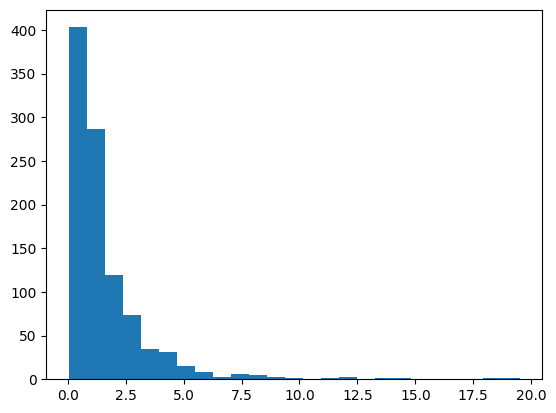

In [ ]:
pyplot.hist(data, bins=25)
pyplot.show()

In [ ]:
data = data.reshape(len(data), 1)

In [ ]:
power = PowerTransformer(method='yeo-johnson', standardize=True)

In [ ]:
data_trans = power.fit_transform(data)

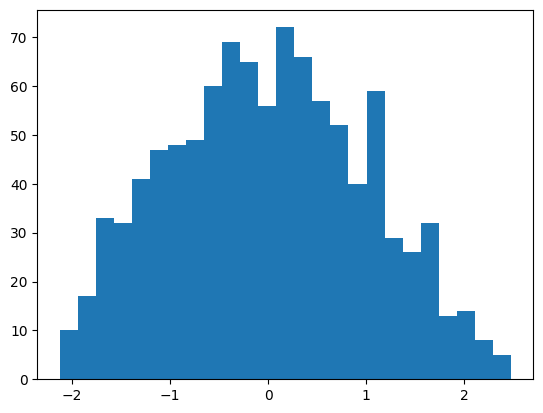

In [ ]:
pyplot.hist(data_trans, bins=25)
pyplot.show()

**Sonar Dataset**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1

In [ ]:
df.shape

(208, 61)

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

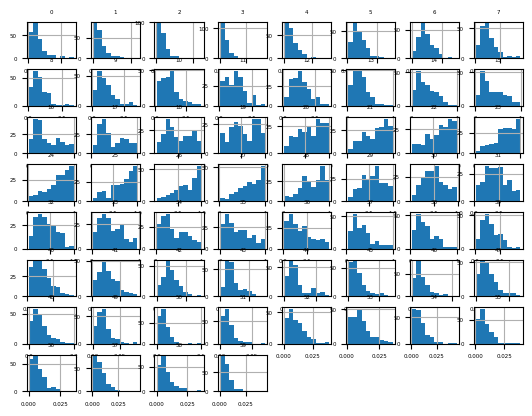

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
model = KNeighborsClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(scores):.3f}   {std(scores):.3f}')

Accuracy: 0.797   0.073


**Box-Cox Transform**

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1

In [ ]:
data = df.values[:, :-1]

In [ ]:
pt = PowerTransformer(method='box-cox')

In [ ]:
data = pt.fit_transform(data)

ValueError: The Box-Cox transformation can only be applied to strictly positive data

**Yeo-Johnson Transform**

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values[:, :-1]

In [ ]:
pt = PowerTransformer(method='yeo-johnson')

In [ ]:
data = pt.fit_transform(data)

In [ ]:
df = DataFrame(data)

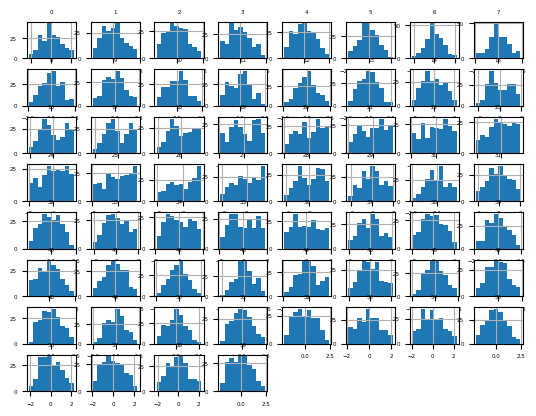

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

**Train the model**

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
power = PowerTransformer(method='yeo-johnson')

In [ ]:
model = KNeighborsClassifier()

In [ ]:
pipeline = Pipeline(steps=[('p', power), ('m', model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(scores): .3f}  {std(scores): .3f}')

Accuracy:  0.808   0.082


Sometimes a lift in performance can be achieved by first standardizing the raw dataset prior to performing a Yeo-Johnson transform. We can explore this by adding a StandardScaler as a first step in the pipeline. The complete example is listed below.

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:,-1]

In [ ]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
scaler = StandardScaler()

In [ ]:
power = PowerTransformer(method='yeo-johnson')

In [ ]:
model = KNeighborsClassifier()

In [ ]:
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(scores): .3f}, {std(scores): .3f}')

Accuracy:  0.816,  0.077


# Change Numerical Data Distributions

**Quantile Transforms**

In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
data = randn(1000)

In [ ]:
data = exp(data)

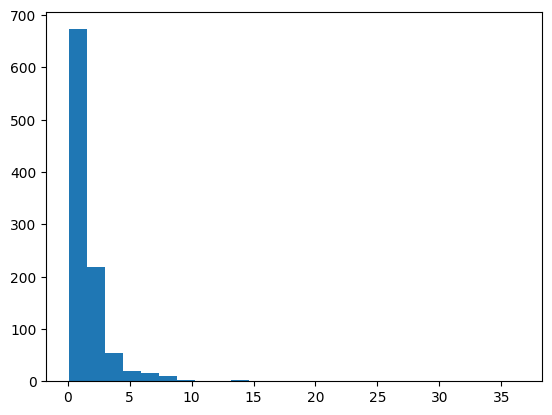

In [ ]:
pyplot.hist(data, bins=25)
pyplot.show()

In [ ]:
data = data.reshape(len(data), 1)

In [ ]:
quantile = QuantileTransformer(output_distribution='normal')

In [ ]:
data_trans = quantile.fit_transform(data)

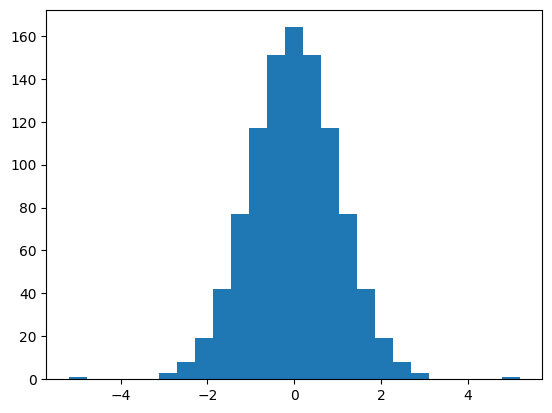

In [ ]:
pyplot.hist(data_trans, bins=25)
pyplot.show()

Sonar Dataset

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values[:, :-1]

In [ ]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')

In [ ]:
data = trans.fit_transform(data)

In [ ]:
df = DataFrame(data)

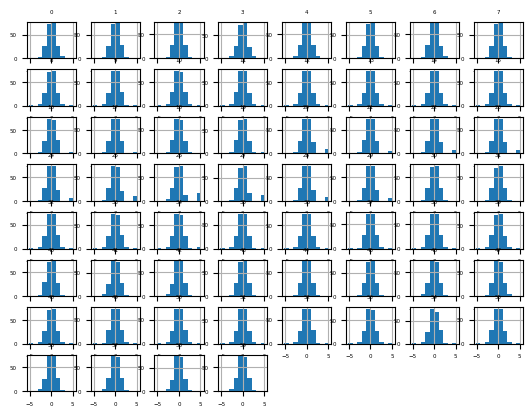

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section, but in this case on a
normal quantile transform of the dataset. The complete example is listed below.

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')

In [ ]:
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')

In [ ]:
model = KNeighborsClassifier()

In [ ]:
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(scores):.3f}  {std(scores): .3f}')

Accuracy: 0.817   0.087


**Uniform Quantile Transform**

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values[:, :-1]

In [ ]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')

In [ ]:
data = trans.fit_transform(data)

In [ ]:
df = DataFrame(data)

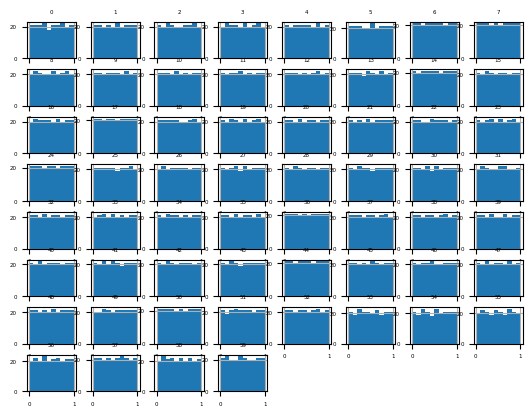

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section, but in this case on a
uniform quantile transform of the raw dataset.

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')

In [ ]:
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')

In [ ]:
model = KNeighborsClassifier()

In [ ]:
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(scores):.3f}  {std(scores):.3f}')

Accuracy: 0.845  0.074


ed to explore the effect of the resolution of the transform on the resulting
skill of the model. The example below performs this experiment and plots the mean accuracy for different n quantiles values from 1 to 99.

# Transform Numerical to Categorical Data

In [ ]:
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot

In [ ]:
data = randn(1000)

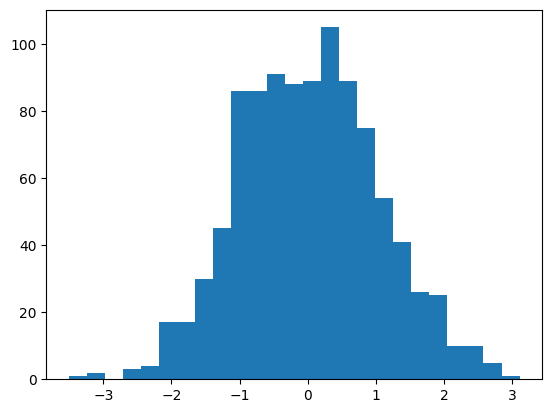

In [ ]:
pyplot.hist(data, bins=25)
pyplot.show()

In [ ]:
data = data.reshape(len(data), 1)

In [ ]:
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [ ]:
data_trans = kbins.fit_transform(data)

In [ ]:
print(data_trans[:10, :])

[[5.]
 [6.]
 [4.]
 [5.]
 [8.]
 [6.]
 [3.]
 [7.]
 [6.]
 [4.]]


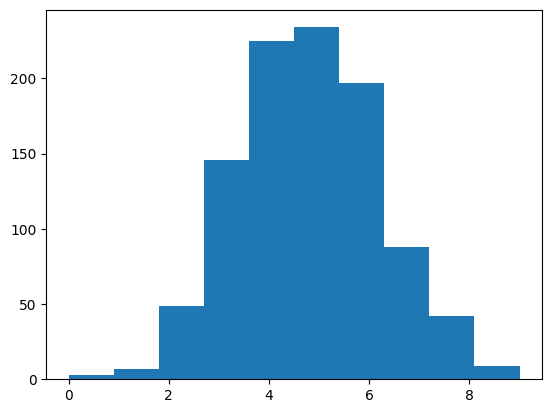

In [ ]:
pyplot.hist(data_trans, bins=10)
pyplot.show()

**Sonar Dataset**

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
print(df.shape)

(208, 61)


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

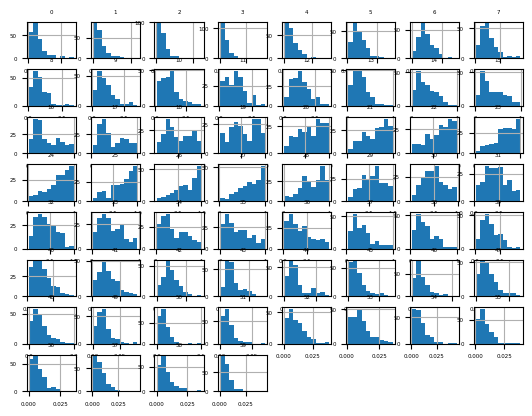

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

Let’s fit and evaluate a machine learning model on the raw dataset.

In [ ]:
from numpy import mean, std
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
model = KNeighborsClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(n_scores): .3f}, {std(n_scores): .3f}')

Accuracy:  0.797,  0.073


**Uniform Discretization Transform**

In [ ]:
from pandas import DataFrame
from sklearn.pipeline import Pipeline

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values[:, :-1]

In [ ]:
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [ ]:
data = trans.fit_transform(data)

In [ ]:
df = DataFrame(data)

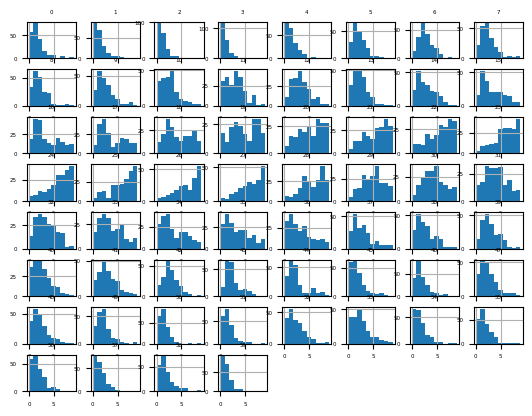

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [ ]:
model = KNeighborsClassifier()

In [ ]:
pipeline = Pipeline(steps = [('t', trans), ('m', model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(n_scores):.3f}, {std(n_scores):.3f}')

Accuracy: 0.829, 0.079


**k-Means Discretization Transform**

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values[:, :-1]

In [ ]:
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

In [ ]:
data = trans.fit_transform(data)

In [ ]:
df = DataFrame(data)

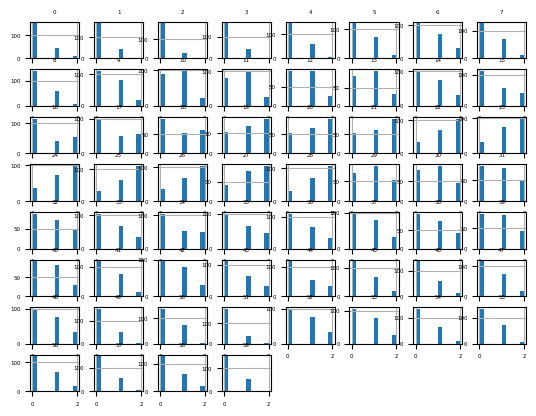

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

Next, let’s evaluate the same KNN model

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

In [ ]:
model = KNeighborsClassifier()

In [ ]:
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(n_scores):.3f}, {std(n_scores):.3f}')

Accuracy: 0.814, 0.084


**Quantile Discretization Transform**

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values[:, :-1]

In [ ]:
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [ ]:
data = trans.fit_transform(data)

In [ ]:
df = DataFrame(data)

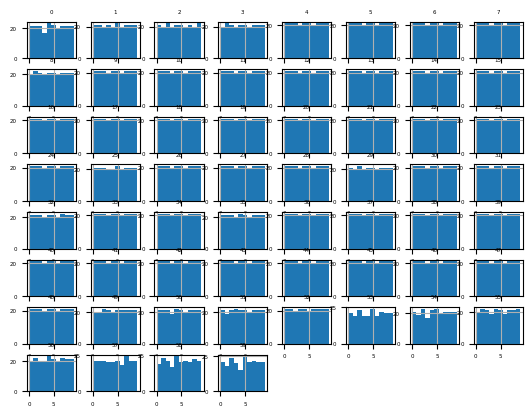

In [ ]:
fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

Next, let’s evaluate the same KNN model

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [ ]:
model = KNeighborsClassifier()

In [ ]:
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(n_scores):.3f} {std(n_scores): .3f}')

Accuracy: 0.840  0.072


We chose the number of bins as an arbitrary number; in this case, 10. This hyperparameter can be tuned to explore the effect of the resolution of the transform on the resulting skill of the model.

In [ ]:
def get_dataset(filename):
    df = read_csv(filename, header=None)
    data = df.values
    X, y = data[:, :-1], data[:, -1]
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

In [ ]:
def get_models():
    models = dict()
    for i in range(2, 11):
        trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile')
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    return scores

In [ ]:
X, y = get_dataset()

In [ ]:
models = get_models()

In [ ]:
results, names = list(), list()

In [ ]:
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f'{name}: {mean(scores): .3f} {mean(scores): .3f}')

2:  0.822  0.822
3:  0.870  0.870
4:  0.838  0.838
5:  0.838  0.838
6:  0.844  0.844
7:  0.852  0.852
8:  0.838  0.838
9:  0.841  0.841
10:  0.840  0.840


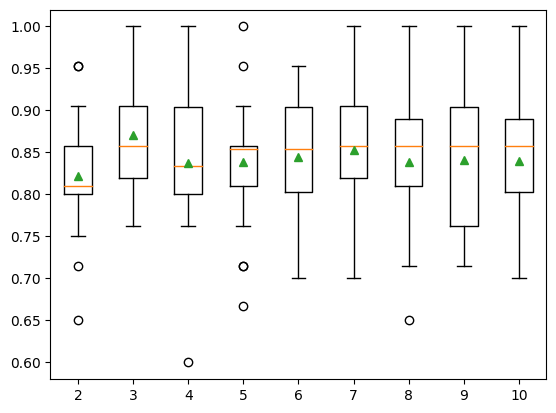

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Derive New Input Variables

Polynomial Feature Transform

In [ ]:
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
data = asarray([[2,3], [2,3], [2,3]])
print(data)

[[2 3]
 [2 3]
 [2 3]]


In [ ]:
trans = PolynomialFeatures(degree=2)

In [ ]:
data = trans.fit_transform(data)

In [ ]:
print(data)

[[1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]]


**Polynomial Feature Transform Example**

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values[:, :-1]

In [ ]:
trans = PolynomialFeatures(degree=3)

In [ ]:
data = trans.fit_transform(data)

In [ ]:
df = DataFrame(data)

In [ ]:
print(df.shape)

(208, 39711)


Next, let’s evaluate the same KNN model

In [ ]:
df = read_csv(data_path + 'sonar.csv', header=None)

In [ ]:
data = df.values

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
X = X.astype('float32')

In [ ]:
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
trans = PolynomialFeatures(degree=3)

In [ ]:
model = KNeighborsClassifier()

In [ ]:
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(n_scores):.3f} {std(n_scores): .3f}')

Accuracy: 0.800  0.077


**Effect of Polynomial Degree**

In [ ]:
X, y = get_dataset(data_path + 'sonar.csv')

In [ ]:
num_feature = list()

In [ ]:
degrees = [i for i in range(1, 6)]

In [ ]:
for d in degrees:
    trans = PolynomialFeatures(degree=d)
    data = trans.fit_transform(X)
    num_feature.append(data.shape[1])
    print(f'Degree: {d}, Features: {data.shape[1]}')

Degree: 1, Features: 61
Degree: 2, Features: 1891
Degree: 3, Features: 39711
Degree: 4, Features: 635376
Degree: 5, Features: 8259888


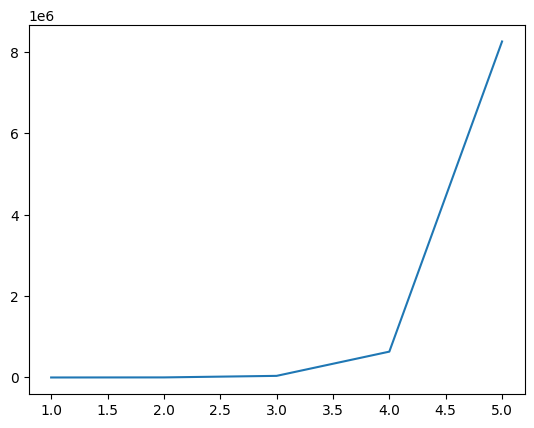

In [ ]:
pyplot.plot(degrees, num_feature)
pyplot.show()

It may be a good
idea to treat the degree for the polynomial features transform as a hyperparameter and test
different values for your dataset.

In [ ]:
def get_models():
    models = dict()
    for d in range(1,5):
        trans = PolynomialFeatures(degree=d)
        model = KNeighborsClassifier()
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

In [ ]:
X, y = get_dataset(data_path + 'sonar.csv')

In [ ]:
models = get_models()

In [ ]:
results, names = list(), list()

In [ ]:
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f'{name}: {mean(scores):.3f} {std(scores):.3f}')

1: 0.797 0.073
2: 0.793 0.085
3: 0.800 0.077
4: 0.795 0.079


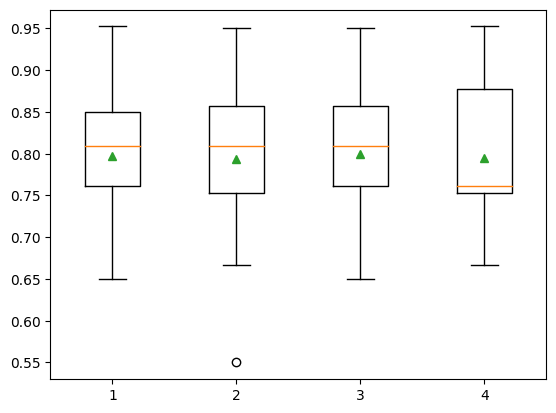

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

**Advanced Transforms**

**Transform Both Numerical and Categorical Data**

Data Preparation for the Abalone Regression Dataset

In [ ]:
from numpy import absolute
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.model_selection import KFold

In [ ]:
df = read_csv(data_path + 'abalone.csv', header=None)

In [ ]:
last_ix = len(df.columns) - 1

In [ ]:
X, y = df.drop(last_ix, axis=1), df[last_ix]

In [ ]:
print(X.shape, y.shape)

(4177, 8) (4177,)


In [ ]:
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

In [ ]:
t = [('cat', OneHotEncoder(), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]

In [ ]:
col_transform = ColumnTransformer(transformers=t)

In [ ]:
model = SVR(kernel='rbf', gamma = 'scale', C=100)

In [ ]:
pipeline = Pipeline(steps=[('prep', col_transform), ('m', model)])

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv)

In [ ]:
scores = absolute(scores)

In [ ]:
print(f'MAE: {mean(scores):.3f} {std(scores): .3f}')

MAE: 1.465  0.047


**Transform the Target in Regression**

Example of Using the TransformedTargetRegressor

In [ ]:
from numpy import loadtxt
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold

In [ ]:
data = loadtxt(data_path + 'boston-housing.csv')

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])

In [ ]:
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)

In [ ]:
scores=absolute(scores)

In [ ]:
print(f'Mean: {mean(scores):.3f}')

Mean: 3.203


We are not restricted to using scaling objects; for example, we can also explore using other data transforms on the target variable, such as the PowerTransformer

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
data = loadtxt(data_path + 'boston-housing.csv')

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
steps = list()

In [ ]:
steps.append(('scale', MinMaxScaler(feature_range=(1e-5, 1))))
steps.append(('power', PowerTransformer()))
steps.append(('model', HuberRegressor()))

In [ ]:
pipeline = Pipeline(steps=steps)

In [ ]:
model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)

In [ ]:
scores = absolute(scores)

In [ ]:
print(f'Mean: {mean(scores): .3f}')

Mean:  2.972


**How to Save and Load Data Transforms**

Worked Example of Saving Data Preparatio

Define a Dataset

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
for i in range(X_test.shape[1]):
    print(f'{i} > train: min={X_train[:, i].min():.3f}, max={X_train[:,i].max(): .3f}, test: min={X_test[:,i].min():.3f}, max={X_test[:,i].max():.3f}')

0 > train: min=-11.856, max= 0.526, test: min=-11.270, max=0.085
1 > train: min=-6.388, max= 6.507, test: min=-5.581, max=5.926


Scale the Dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from pickle import dump

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
for i in range(X_test.shape[1]):
        print(f'{i} > train: min={X_train_scaled[:, i].min():.3f}, max={X_train_scaled[:,i].max(): .3f}, test: min={X_test_scaled[:,i].min():.3f}, max={X_test_scaled[:,i].max():.3f}')

0 > train: min=0.000, max= 1.000, test: min=0.047, max=0.964
1 > train: min=0.000, max= 1.000, test: min=0.063, max=0.955


Save Model and Data Scaler

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

In [ ]:
X_tarin, _, y_train, _ = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_tarin)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
model = LogisticRegression(solver='lbfgs')

In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
dump(model, open('model.pkl', 'wb'))

In [ ]:
dump(scaler, open('scaler.pkl', 'wb'))

Load Model and Data Scaler

In [ ]:
from pickle import load

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

In [ ]:
_, X_test, _, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
scaler = load(open('model.pkl'))